In [1]:
# 00_data_cleaning.ipynb

# manipulating data / manipular la data
import pandas as pd, numpy as np

# system + paths / sistema y rutas
import sys, os, runpy, warnings
from pathlib import Path
from contextlib import redirect_stdout, redirect_stderr

# drawings / diagramas
import schemdraw, schemdraw.elements as elm

# run loader / ejecutar loader
sys.path.insert(0, str(Path.cwd().parent / "src"))
warnings.filterwarnings("ignore")
with open(os.devnull, "w") as devnull, redirect_stdout(devnull), redirect_stderr(devnull):
    runpy.run_path(str(Path.cwd().parent / "src" / "load_data.py"), run_name="__main__")

In [2]:
# 1.) Load GEI inventory / Cargar inventario GEI
# https://datos.comunidad.madrid/dataset/atm_inventario_gei

from load_data import load_gei; df_gei = load_gei()

In [3]:
# 1.1) Shape
df_gei.shape

(5885, 6)

In [4]:
# 1.2) Dtypes
df_gei.dtypes

inventario_gei_año               int64
inventario_gei_sector_crf       object
inventario_gei_categoria_crf    object
inventario_gei_actividad_crf    object
inventario_gei_contaminante     object
inventario_gei_gg_co2_eq        object
dtype: object

In [5]:
# 1.3) Head
df_gei.head()

,inventario_gei_año,inventario_gei_sector_crf,inventario_gei_categoria_crf,inventario_gei_actividad_crf,inventario_gei_contaminante,inventario_gei_gg_co2_eq
0,1990,CRF 1 Energía,1.A. Actividades de combustión,1A1a Producción de energía y calor en plantas ...,N2O,"0,015104735"
1,1990,CRF 1 Energía,1.A. Actividades de combustión,1A1a Producción de energía y calor en plantas ...,CH4,"0,01595958"
2,1990,CRF 1 Energía,1.A. Actividades de combustión,1A1c Fabricación de combustibles sólidos y ot...,CH4,"0,001038352"
3,1990,CRF 1 Energía,1.A. Actividades de combustión,1A1c Fabricación de combustibles sólidos y ot...,CO2,"1,14493"
4,1990,CRF 1 Energía,1.A. Actividades de combustión,1A1c Fabricación de combustibles sólidos y ot...,N2O,"0,005255745"


In [6]:
# 1.4) Tail
df_gei.tail()

,inventario_gei_año,inventario_gei_sector_crf,inventario_gei_categoria_crf,inventario_gei_actividad_crf,inventario_gei_contaminante,inventario_gei_gg_co2_eq
5880,2022,CRF 5 Residuos,5.C. Incineración y quema en espacio abierto d...,5C21 Quema abierta de residuos Biogénicos,N2O,"0,87479309"
5881,2022,CRF 5 Residuos,5.D. Tratamiento y eliminación de aguas residu...,5D1 Aguas residuales domésticas,CH4,"52,131028852"
5882,2022,CRF 5 Residuos,5.D. Tratamiento y eliminación de aguas residu...,5D1 Aguas residuales domésticas,N2O,"115,4508699"
5883,2022,CRF 5 Residuos,5.D. Tratamiento y eliminación de aguas residu...,5D2 Aguas residuales industriales,CH4,"176,293177564"
5884,2022,CRF 5 Residuos,5.E. Otros,5E1 Esparcimiento de lodos,CH4,"0,075236532"


In [7]:
# 1.5) Info
df_gei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   inventario_gei_año            5885 non-null   int64 
 1   inventario_gei_sector_crf     5885 non-null   object
 2   inventario_gei_categoria_crf  5885 non-null   object
 3   inventario_gei_actividad_crf  5885 non-null   object
 4   inventario_gei_contaminante   5885 non-null   object
 5   inventario_gei_gg_co2_eq      5885 non-null   object
dtypes: int64(1), object(5)
memory usage: 276.0+ KB


In [8]:
# 1.6) Subsets
df_gei[["inventario_gei_contaminante", "inventario_gei_gg_co2_eq"]]

,inventario_gei_contaminante,inventario_gei_gg_co2_eq
0,N2O,"0,015104735"
1,CH4,"0,01595958"
2,CH4,"0,001038352"
3,CO2,"1,14493"
4,N2O,"0,005255745"
...,...,...
5880,N2O,"0,87479309"
5881,CH4,"52,131028852"
5882,N2O,"115,4508699"
5883,CH4,"176,293177564"


In [9]:
# 1.7) Filter / Filtrar
df_gei.iloc[2047:2147, [4, 5, 0]]

,inventario_gei_contaminante,inventario_gei_gg_co2_eq,inventario_gei_año
2047,CH4,"3,9945774765",2002
2048,N2O,"1,9755665683",2002
2049,CO2,"1174,1300824046",2002
2050,CH4,"29,4242355219",2002
2051,CO2,"1119,8418158073",2002
...,...,...,...
2142,N2O,"13,06960496",2002
2143,N2O,"2,76336912",2002
2144,N2O,"2,92687253",2002
2145,N2O,"5,26927325",2002


In [10]:
# 1.8) Query / Consulta
try: df_gei.query("inventario_gei_gg_co2_eq > 1000 and inventario_gei_año >= '2020'")
except Exception as e: print("Query failed due to dtypes:", e)

Query failed due to dtypes: '>' not supported between instances of 'str' and 'int'


In [11]:
# 1.9) Describe
df_gei.describe(include='all')

,inventario_gei_año,inventario_gei_sector_crf,inventario_gei_categoria_crf,inventario_gei_actividad_crf,inventario_gei_contaminante,inventario_gei_gg_co2_eq
count,5885.000000,5885,5885,5885,5885,5885
unique,NaN,5,27,129,6,5500
top,NaN,CRF 1 Energía,1.A. Actividades de combustión,2F1c Refrigeración industrial,CO2,"0,0"
freq,NaN,1774,1660,203,2063,309
mean,2006.516907,NaN,NaN,NaN,NaN,NaN
std,9.424857,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN
25%,1999.000000,NaN,NaN,NaN,NaN,NaN
50%,2007.000000,NaN,NaN,NaN,NaN,NaN
75%,2015.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
# 1.10) Drop Columns
# No

In [13]:
# 1.11) Renaming / Renombrado
df_gei.rename(columns={
    "inventario_gei_año": "gei_yr",                        # Año / year
    "inventario_gei_sector_crf": "gei_crf_sector",         # CRF Sector
    "inventario_gei_categoria_crf": "gei_crf_cat",         # CRF Categoría / Category
    "inventario_gei_actividad_crf": "gei_crf_act",         # CRF Actividad / Activity
    "inventario_gei_contaminante": "gei_pollutant",        # Contaminante
}, inplace=True)

In [14]:
# 1.12) Unit Reconversion / Reconvertir Unidades
# inventario_gei_gg_co2_eq in Giga grams convert to numeric tons / Convertir a toneladas numéricas
df_gei["gei_co2_eq_t"] = (
    df_gei["inventario_gei_gg_co2_eq"]
    .astype(str)
    .str.replace(",", ".", regex=False)       # convert comma to dot
    .str.extract(r"([-+]?\d*\.?\d+)", expand=False)  # extract numeric part
    .astype(float) * 1000                     # Gg → tons
)

In [15]:
# 1.13) Counts Sector
df_gei.gei_crf_sector.value_counts()

gei_crf_sector
CRF 1 Energía                                                          1774
CRF 2 Procesos industriales y uso de productos                         1394
CRF 4 Uso de la tierra, cambios de usos de la tierra y selvicultura    1320
CRF 3 Sector agrario                                                    982
CRF 5 Residuos                                                          415
Name: count, dtype: int64

In [16]:
# 1.14) Counts Cat
df_gei.gei_crf_cat.value_counts()

gei_crf_cat
1.A. Actividades de combustión                                      1660
2.F. Consumo de gases fluorados                                      912
3.B. Gestión del estiércol                                           297
4.A. Tierras forestales                                              264
4.C. Pastizales                                                      264
4.B. Tierras de cultivo                                              264
3.A. Fermentación entérica                                           256
3.D. Suelos agrícolas                                                198
4.F. Otras tierras                                                   198
4.E. Asentamientos                                                   198
2.G. Otras fuentes de emisión de procesos industriales               196
3.F. Quema en el campo de residuos agrícolas                         164
2.A. Productos minerales                                             156
5.C. Incineración y quema en espacio ab

In [17]:
# 1.15) Activity List
df_gei["gei_crf_act"].unique()

array(['1A1a Producción de energía y calor en plantas de servicio público',
       '1A1c  Fabricación de combustibles sólidos y otras industrias energéticas',
       '1A2a Hierro y acero', '1A2b Metales no ferrosos',
       '1A2c Productos químicos',
       '1A2d Pasta de papel, papel e impresión',
       '1A2e  Procesado de alimentos, bebidas y tabaco',
       '1A2f Minerales no metálicos', '1A2g Otros sectores',
       '1A3a Transporte aéreo civil', '1A3b Transporte rodado',
       '1A3c Transporte por ferrocarril',
       '1A4a Comercial / institucional', '1A4b  ResidencialEstacionaria',
       '1A4c Agricultura/Pesca/Forestal',
       '1A5b  Otros, móviles (incluidos barcos militares, terrestres y de recreo)',
       '1B2b Emisiones fugitivas de gas natural ',
       '2A1 Producción de cemento', '2A2 Producción de Cal',
       '2A3 Producción de vidrio', '2A4a Producción de cerámica',
       '2A4b Otros usos de carbonato sódico ', '2C1a Producción de acero',
       '2C5 Producción 

In [18]:
# 1.16) Extract CRF from Activity / Extraer el CRF completo de la columna Actividad
df_gei["gei_crf"] = df_gei["gei_crf_act"].apply(lambda x: x.split()[0])
df_gei["gei_crf"].unique()

array(['1A1a', '1A1c', '1A2a', '1A2b', '1A2c', '1A2d', '1A2e', '1A2f',
       '1A2g', '1A3a', '1A3b', '1A3c', '1A4a', '1A4b', '1A4c', '1A5b',
       '1B2b', '2A1', '2A2', '2A3', '2A4a', '2A4b', '2C1a', '2C5', '2D1',
       '2D2', '2G1a', '2G1b', '2G3a', '2G3b', '3A11', '3A12', '3A2',
       '3A31', '3A42', '3A43', '3A44', '3A46', '3B11', '3B12', '3B13',
       '3B14', '3B21', '3B22', '3B23', '3B24', '3B25', '3D11', '3D12',
       '3D13', '3D14', '3D21', '3D22', '3F11', '3F12', '3F13', '3F14',
       '3F31', '3F5', '3H', '3I', '4(IV)2', '4A11', '4A21', '4A22',
       '4A23', '4A24', '4A25', '4B11', '4B21', '4B22', '4B23', '4B24',
       '4B25', '4C11', '4C21', '4C22', '4C23', '4C24', '4C25', '4D12',
       '4D22', '4E11', '4E21', '4E22', '4E23', '4E24', '4E25', '4F11',
       '4F21', '4F22', '4F23', '4F24', '4F25', '4G11', '5A1a', '5A2',
       '5B1a', '5C12', '5C21', '5C22', '5D1', '5D2', '5E1', '3F21', '3F4',
       '2F3a', '2F3b', '2G2b', '1A3e', '2F1a', '2F1b', '2F1c', '2F1d',
     

In [19]:
# 1.17) Rename 4(IV)2 as 3D2
df_gei["gei_crf"] = df_gei["gei_crf"].replace({"4(IV)2": "3.D.2"})
# Source: https://naei.energysecurity.gov.uk/glossary/crf-code-list

In [20]:
# 1.18) Pollutant Count
df_gei.gei_pollutant.value_counts()

gei_pollutant
CO2    2063
CH4    1455
N2O    1325
HFC     815
SF6     130
PFC      97
Name: count, dtype: int64

In [21]:
# 1.19) Drop
df_gei = (df_gei[["gei_yr", "gei_crf", "gei_co2_eq_t", "gei_pollutant"]])

In [22]:
# 1.20) Final Check
from load_data import inspect_columns
inspect_columns(df_gei, name="df_gei")


⨁ Inspection of df_gei — shape: (5885, 4)  | identical_rows: 0

∑ Numeric columns:
  gei_yr: null_count=0 | null%=0.0% | unique_nonnull=33 | duplicate_values_count=5852
  gei_co2_eq_t: null_count=0 | null%=0.0% | unique_nonnull=5500 | duplicate_values_count=385

Ⅽ Categorical columns:
  gei_crf: null_count=0 | null%=0.0% | unique_nonnull=128 | duplicate_values_count=5757
  gei_pollutant: null_count=0 | null%=0.0% | unique_nonnull=6 | duplicate_values_count=5879


In [23]:
# 1.21) Save
from load_data import save_clean
save_clean(df_gei, "df_gei.csv")

WindowsPath('C:/_Workspace/2_Work/1_Projects_Active/Low-Carbon-Heating-Roadmap-for-Madrid/data/clean/df_gei.csv')

#### GEI Dataset Overview / Resumen del Inventario GEI

- **Shape / Dimensiones**: `(5885, 6)`  
- **Dtypes / Tipos de datos**:

| Column name                     | Type    | Meaning (EN)                                      | Significado (ES)                                      |
|--------------------------------|---------|--------------------------------------------------|--------------------------------------------------------|
| `inventario_gei_año`           | int     | Reference Year                                  | Año de Referencia                              |
| `inventario_gei_sector_crf`    | object  | CRF sector                                       | Sector CRF desde el que se emite el contaminante      |
| `inventario_gei_categoria_crf` | object  | CRF category                                     | Categoría CRF desde la que se emite el contaminante   |
| `inventario_gei_actividad_crf` | object  | CRF activity                                     | Actividad CRF desde la que se emite el contaminante   |
| `inventario_gei_contaminante`  | object  | Greenhouse gas type                              | Tipo de gas de efecto invernadero                     |
| `inventario_gei_gg_co2_eq`     | object  | Emissions in CO₂ equivalent (Gigagrams CO₂-eq)          | Emisiones en Gg equivalentes de CO₂                   |

> **Note / Nota**:  
> CRF (Common Reporting Format) is a standardized classification system defined by the UNFCCC  
> to report greenhouse gas emissions consistently by sector, category, and activity.  
> CRF (Formato Común de Reporte) es un sistema estandarizado definido por la CMNUCC  
> para reportar emisiones de gases de efecto invernadero de forma coherente por sector, categoría y actividad.

- **Head(1) / Primer registro**:

| Año  | Sector CRF     | Categoría CRF                  | Actividad CRF                                               | Contaminante | GEI CO₂ eq   |
|------|----------------|--------------------------------|--------------------------------------------------------------|--------------|--------------|
| 1990 | CRF 1 Energía  | 1.A. Actividades de combustión | 1A1a Producción de energía y calor en plantas públicas       | N₂O          | 0.015104735  |

#### GEI Dataset Cleaned / Data del Inventario GEI Limpia

##### ∑ Numeric Columns / Columnas Numéricas
- `gei_yr`: 33 unique years, no nulls → covers 1990–2022  
- `gei_co2_eq_t`: 5500 unique values, no nulls → high granularity in emissions  

##### Ⅽ Categorical Columns / Columnas Categóricas
- `gei_crf`: 129 unique activities → detailed CRF breakdown  
- `pollutant`: 6 unique gases → CH₄, CO₂, N₂O, SF₆, HFC, PFC  

##### Interpretation / Interpretación
- No missing values → dataset is structurally complete  
- High uniqueness in `gei_co2_eq_t` → emissions vary significantly by activity  
- CRF structure is dense → ideal for Pareto analysis and sectoral targeting  
- Duplicate rows are not errors — they reflect repeated CRF structure across years and pollutants

In [24]:
# 2.) Load and inspect PST dataset ∣ Cargar e inspeccionar Emisión PST (Partículas en suspensión)
# https://datos.comunidad.madrid/dataset/1911600 Breaks down emissions by activity and pollutant type.
# → Supports air quality validation and helps correlate heating sources with pollution hotspots.

from load_data import load_pst; df_pst = load_pst()
print(f"- shape: {df_pst.shape}\n- dtypes:\n{df_pst.dtypes}\n- head(1):\n{df_pst.head(1)}")

- shape: (264, 7)
- dtypes:
año                    int64
concepto              object
tipo_territorio       object
código_territorio    float64
territorio           float64
valor                  int64
estado_dato          float64
dtype: object
- head(1):
    año                                           concepto tipo_territorio  \
0  2000  Emisión de partículas en suspensión en otras f...           Otros   

   código_territorio  territorio  valor  estado_dato  
0                NaN         NaN    830          NaN  


### PST Dataset Summary / Resumen del conjunto PST

- **Shape / Dimensiones**: `(264, 7)`  

| Column name           | Type     | Description (EN)                                                | Descripción (ES)                                           |
|-----------------------|----------|------------------------------------------------------------------|-------------------------------------------------------------|
| `año`                 | int      | Reference year                                                   | Año de referencia                                           |
| `concepto`            | object   | Emission concept (activity + pollutant type)                    | Concepto de emisión (actividad + tipo de contaminante)      |
| `tipo_territorio`     | object   | Territory type (e.g., municipality, region)                     | Tipo de territorio (municipio, región, etc.)                |
| `código_territorio`   | float    | Territory code (may be missing)                                 | Código del territorio (puede faltar)                        |
| `territorio`          | float    | Territory name (may be missing)                                 | Nombre del territorio (puede faltar)                        |
| `valor`               | int      | Emission value in metric tons                                   | Valor de emisión en toneladas métricas                      |
| `estado_dato`         | float    | Data status (e.g., estimated, validated; often missing)         | Estado del dato (estimado, validado; frecuentemente nulo)   |

> Note: Missing values in `territorio`, `código_territorio`, and `estado_dato` suggest regional aggregates or incomplete metadata.

In [25]:
# 2.1) Column rename and drop / Renombrado de columnas y eliminación

df_pst = (
    df_pst[["año", "concepto", "valor"]]
    .rename(columns={
        "año": "year",                     # Año de referencia
        "concepto": "emission_concept",    # Actividad + tipo de contaminante
        "valor": "tons_pst"                # Emisiones en toneladas de partículas en suspensión
    })
)

In [26]:
# 2.2) Check for Nulls, Uniques and Duplicates in numerical and categorical columns / Revisar nulos, únicos y duplicados en columnas
from load_data import inspect_columns
inspect_columns(df_pst, name="df_pst")


⨁ Inspection of df_pst — shape: (264, 3)  | identical_rows: 0

∑ Numeric columns:
  year: null_count=0 | null%=0.0% | unique_nonnull=22 | duplicate_values_count=242
  tons_pst: null_count=0 | null%=0.0% | unique_nonnull=224 | duplicate_values_count=40

Ⅽ Categorical columns:
  emission_concept: null_count=0 | null%=0.0% | unique_nonnull=12 | duplicate_values_count=252


### Inspection Summary – PST Dataset / Resumen de inspección – Emisión PST

#### Numeric Columns / Columnas numéricas

| Column     | Nulls | Duplicates | Unique | Notes / Notas                          |
|------------|-------|------------|--------|----------------------------------------|
| `year`     | 0     | —          | 22     | Covers 22 years (2000–2021) / 22 años cubiertos (2000–2021)          |
| `tons_pst` | 0     | 1          | 224    | Detailed values; only 1 duplicate / Valores detallados; solo 1 duplicado   |

#### Categorical Columns / Columnas categóricas

| Column             | Nulls | Duplicates | Unique | Notes / Notas                                  |
|--------------------|-------|------------|--------|------------------------------------------------|
| `emission_concept` | 0     | 252        | 12     | 12 concepts repeated yearly / 12 conceptos repetidos por año y territorio    |

> No nulls / Sin nulos  
> Duplicates expected / Duplicados esperados  
> Ready for trend & hotspot analysis / Listo para análisis de tendencias y focos

In [27]:
# 2.3) # No more cleaning, EDA ready / No hay necesidad de mas limpieza, lista para AED
# save / guardar
from load_data import save_clean
save_clean(df_pst, "pst.csv")

WindowsPath('C:/_Workspace/2_Work/1_Projects_Active/Low-Carbon-Heating-Roadmap-for-Madrid/data/clean/pst.csv')

In [28]:
# 3.) Load and inspect Buildings Energy Certificates dataset ∣ Cargar e inspeccionar Certificados de Eficiencia Energética Edificios (CEEE)
# https://datos.comunidad.madrid/catalogo/dataset/registro_certificados_eficiencia_energetica # Contains energy ratings for buildings.
# → Filter by “Madrid” and join with district shapefiles to estimate heating demand.

from load_data import load_ceee; df_ceee = load_ceee()
print(f"- columns:\n{df_ceee.columns.tolist()}")
inspect_columns(df_ceee, name="df_ceee")  

- columns:
['edif_tiporeg', 'edif_codreg', 'edif_direc', 'edif_muni', 'edif_codpost', 'edif_prov', 'edif_zonaclim', 'edif_año', 'edif_norma', 'edif_refcat', 'edif_tipo', 'edif_proced', 'edif_fecha', 'edif_superf', 'edif_compac', 'edif_calef', 'edif_refrig', 'edif_acrist', 'edif_acs', 'calefac_nombre', 'calefac_tipo', 'calefac_potenc', 'calefac_rendim', 'calefac_vector', 'calefac_modo', 'refrig_nombre', 'refrig_tipo', 'refrig_potenc', 'refrig_rendim', 'refrig_vector', 'refrig_modo', 'acs_nombre', 'acs_tipo', 'acs_potencnom', 'acs_rendim', 'acs_vector', 'acs_modo', 'acs_potenctot', 'termica_nombre', 'termica_calef', 'termica_refrig', 'termica_acscons', 'termica_acsdem', 'elec_nombre', 'elec_energia', 'elec_reduglobal', 'elec_reduco2', 'elec_demglobal', 'elec_demcalef', 'elec_demrefrig', 'elec_demacs', 'final_global', 'final_calef', 'final_refrig', 'final_acs', 'final_ilu', 'norenov_global', 'norenov_calef', 'norenov_refrig', 'norenov_acs', 'norenov_ilu', 'norenov_co2global', 'norenov_co2

### Columns Inspection of CEEE / Inspección de columnas de datos de edificios
### Final Selection / Selección Final

| Column | English meaning | Spanish meaning | Units | Why Keep |
|---|---|---|---:|---|
| edif_codpost | Postal code | Código postal | string(5) | Validate district membership and spatial joins |
| edif_fecha | Certificate date | Fecha de emisión | datetime | Time dimension for trends and eligibility |
| edif_año | Year built | Año de construcción | int | Building vintage for retrofit readiness |
| edif_superf | Habitable surface | Superficie habitable | m2 | Normalize metrics and scale interventions |
| edif_compac | Compactness | Compacticidad vol/sup | m3/m2 | Proxy for envelope losses and retrofit impact |
| edif_calef | % area heated | % superficie con calefacción | % | Identify heated stock to target interventions |
| calefac_tipo | Heating type | Tipo de calefacción | category | Core tech classification for replacement scenarios |
| calefac_vector | Heating vector | Vector energético calefacción | category | Fuel mix to model decarbonization pathway |
| elec_demcalef | Heating demand (DB-HE) | Demanda calefacción (DB-HE) | kWh/m2·a | Baseline heating load for Pareto and sizing |
| final_calef | Final energy heating | Consumo final calefacción | kWh/m2·a | Direct mapping to heating energy use |
| norenov_calef | Non-renewable heating energy | Energía no renovable calefacción | kWh/m2·a | Fossil heating baseline for emissions modelling |
| norenov_co2calef | CO2 heating | Emisiones CO2 calefacción | kg CO2/m2·a | Primary outcome metric for heating emissions |
| acs_tipo | Hot-water type | Tipo de ACS | category | ACS decarbonization route and sizing |
| elec_demacs | ACS demand (DB-HE) | Demanda ACS (DB-HE) | kWh/m2·a | ACS sizing and emissions attribution |
| cal_calefdem | Heating demand rating | Calificación demanda calefacción (A–F) | grade | Quick filter to prioritise worst performers |
| cal_norenovglobal | Non-renewable rating global | Calificación energía no renovable (A–F) | grade | Flag poor stock for district prioritisation |
| cal_co2global | CO2 rating global | Calificación emisiones CO2 (A–F) | grade | Communicable KPI for stakeholders |

In [29]:
# 3.1) Drop unnecesary columns / Suprimir columnas innecesarias
df_ceee = df_ceee[ ['edif_codpost','edif_fecha','edif_año','edif_superf','edif_compac','edif_calef','calefac_tipo', 'calefac_vector','elec_demcalef','final_calef','norenov_calef','norenov_co2calef','acs_tipo','elec_demacs', 'cal_calefdem','cal_norenovglobal','cal_co2global'] ].reset_index(drop=True)

In [30]:
# 3.2) Column rename / Renombrado de columnas
rename_dict = {
    'edif_codpost': 'e_postal_code',           # Postal code / Código postal (5-digit string)
    'edif_fecha': 'ceee_date',                 # Certificate issue date / Fecha emisión (datetime)
    'edif_año': 'e_year_built',                # Year built / Año construcción (int)
    'edif_superf': 'e_surface_m2',             # Surface area / Superficie (m2)
    'edif_compac': 'e_compactness_m3_m2',      # Compactness (vol/area) / Compacticidad (m3/m2)
    'edif_calef': 'e_pct_surface_heated',      # % surface heated / % superficie con calefacción (pct 0-100)
    'calefac_tipo': 'e_heating_type',          # Heating system type / Tipo de calefacción (category)
    'calefac_vector': 'e_heating_vector',      # Heating energy vector / Vector energético (text)
    'elec_demcalef': 'e_heating_demand_kwh_m2_a', # Heating demand (DB-HE) / Demanda calefacción (kWh/m2·a)
    'final_calef': 'final_heating_kwh_m2_a',   # Final heating consumption / Consumo final calefacción (kWh/m2·a)
    'norenov_calef': 'nonren_heating_kwh_m2_a',# Non-renewable heating energy / Energía no renovable calefacción (kWh/m2·a)
    'norenov_co2calef': 'nonren_co2_heating_kg_m2_a', # CO2 heating / Emisiones CO2 calefacción (kg CO2/m2·a)
    'acs_tipo': 'e_hot_water_type',                  # Hot-water system type / Tipo ACS (category)
    'elec_demacs': 'e_hotwater_demand_kwh_m2_a',    # ACS demand (DB-HE) / Demanda ACS (kWh/m2·a)
    'cal_calefdem': 'rating_heating_demand',   # Heating demand rating / Calificación demanda calefacción (A-F)
    'cal_norenovglobal': 'rating_nonren_global',# Non-renewable global rating / Calificación no renovable global (A-F)
    'cal_co2global': 'rating_co2_global'       # CO2 global rating / Calificación CO2 global (A-F)
}
df_ceee.rename(columns=rename_dict, inplace=True)

In [31]:
# 3.3) Inspect postal codes since we are only interested in Madrid / Inspeccionar códigos postales para ver edificios en Madrid municipio 

# Provided official Madrid postal codes
madrid_codes_official = {
    "28001","28002","28003","28004","28005","28006","28007","28008","28009","28010",
    "28011","28012","28013","28014","28015","28016","28017","28018","28019","28020",
    "28021","28022","28023","28024","28025","28026","28027","28028","28029","28030",
    "28031","28032","28033","28034","28035","28036","28037","28038","28039","28040",
    "28041","28042","28043","28044","28045","28046","28047","28048","28049","28050",
    "28051","28052","28053","28054","28055","46005"
}

s = df_ceee['e_postal_code'].astype('string').str.strip()
df_ceee['postal_in_madrid_official'] = s.isin(madrid_codes_official)

result = {
    'total_rows': len(s),
    'null_count': int(s.isna().sum()),
    'null_pct': float(s.isna().mean()),
    'match_count': int(df_ceee['postal_in_madrid_official'].sum()),
    'match_pct_of_nonnull': float(df_ceee.loc[s.notna(), 'postal_in_madrid_official'].mean()) if s.notna().any() else 0.0,
    'nonmatch_count': int((~df_ceee['postal_in_madrid_official'] & s.notna()).sum()),
    'top_20_nonmatches': s[~df_ceee['postal_in_madrid_official'] & s.notna()].value_counts().head(20).to_dict()
}
print(result)

{'total_rows': 115596, 'null_count': 55, 'null_pct': 0.00047579501020796565, 'match_count': 56342, 'match_pct_of_nonnull': 0.4876364234341056, 'nonmatch_count': 59199, 'top_20_nonmatches': {'28850': 1923, '28660': 1355, '28400': 1157, '28670': 1052, '28223': 1043, '28100': 1041, '28770': 1001, '28939': 970, '28806': 940, '28760': 927, '28300': 843, '28523': 836, '28922': 776, '28341': 740, '28500': 729, '28320': 718, '28224': 690, '28220': 685, '28260': 633, '28903': 633}}


In [32]:
# 3.4) Clean common artifacts (remove non-digits, fix "28.002" → "28002", strip trailing ".0", pad to 5 digits) and keep only rows whose cleaned code is in the provided madrid_codes_official set. / Limpia artefactos comunes (quita no‑dígitos, convierte "28.002" → "28002", elimina ".0" final, rellena a 5 dígitos) y conserva solo filas cuyo código limpio está en madrid_codes_official.

df_ceee = df_ceee[
    df_ceee['e_postal_code'].astype(str)
        .str.replace(r'[^\d\.]', '', regex=True)
        .str.replace(r'^(\d{2})\.(\d{3})$', r'\1\2', regex=True)
        .str.replace(r'\.0+$', '', regex=True)
        .str.replace(r'\.', '', regex=True)
        .str.extract(r'(280[0-4]\d|2805[0-5])', expand=False)
        .str.zfill(5)
        .isin(madrid_codes_official)
].reset_index(drop=True)
df_ceee = df_ceee.drop(columns=['postal_in_madrid_official'])

In [33]:
# 3.5) Check for Nulls, Uniques and Duplicates in numerical and categorical columns / Revisar nulos, únicos y duplicados en columnas

import re

sentinels = ['99999999,99','99999999.99','99999999','99999999,00','NaN','nan','NULL','-']
df = df_ceee.copy()

# Numeric candidates: unify decimal separators, remove thousand separators, map sentinels to NaN, coerce to float / Candidatos númericos : unificar separador decimal, quitar separador de miles, mapear sentinelas a NaN, convertir a float
num_candidates = [
    'e_surface_m2','e_compactness_m3_m2','e_heating_power_kw','e_heating_efficiency_pct',
    'e_heating_demand_kwh_m2_a','final_heating_kwh_m2_a','nonren_heating_kwh_m2_a',
    'nonren_co2_heating_kg_m2_a','e_hotwater_demand_kwh_m2_a','e_pct_surface_heated'
]
for c in num_candidates:
    if c in df.columns:
        s = df[c].astype(str).replace(sentinels, pd.NA)
        s = s.str.replace(r'\.', '', regex=True).str.replace(',', '.', regex=True)
        s = s.str.replace(r'[^\d\.\-]', '', regex=True)
        df[c] = pd.to_numeric(s, errors='coerce')

# Dates and year: parse dd/mm/yyyy, extract 4-digit year to Int64 nullable / Fechas y año: parsear dd/mm/yyyy, extraer año 4 dígitos como Int64 nullable
if 'ceee_date' in df.columns:
    df['ceee_date'] = pd.to_datetime(df['ceee_date'], dayfirst=True, errors='coerce')
if 'e_year_built' in df.columns:
    df['e_year_built'] = pd.to_numeric(df['e_year_built'].astype(str).str.extract(r'(\d{4})')[0], errors='coerce').astype('Int64')

# Categorical compression: convert textual labels to category dtype for memory and grouping / Categorías: convertir etiquetas textuales a category para memoria y agrupación
cat_cols = [
    'e_heating_type','e_heating_vector','e_hot_water_type',
    'rating_heating_demand','rating_nonren_global','rating_co2_global'
]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Drop extremely sparse columns (>50% null) to reduce noise / Suprimir columnas extremadamente dispersas (>50% nulos) para reducir ruido 

thresh = int(0.5 * len(df))
drop_cols = [c for c in df.columns if df[c].isna().sum() > thresh]
if drop_cols:
    df = df.drop(columns=drop_cols)

df_ceee = df.reset_index(drop=True)

In [34]:
# 3.5.1) It should be 55 uniques / Deberían ser 55 únicos

postal_code_replacements = {
    "2586512VK4728F0022XW" : "NaN",
    "28.001": "28001",
    "28.002": "28002",
    "28.003": "28003",
    "28.002": "28002",
    "28.005": "28005",
    "28.006": "28006",
    "28.007": "28007",
    "28.008": "28008",
    "28.009": "28009",
    "28.010": "28010",
    "28.011": "28011",
    "28.012": "28012",
    "28.013": "28013",
    "28.014": "28014",
    "28.015": "28015",
    "28.016": "28016",
    "28.017": "28017",
    "28.018": "28018",
    "28.019": "28019",
    "28.020": "28020",
    "28.017": "28017",
    "28.028": "28028",
    "28.031": "28031",
    "28.034": "28034",
    "28.035": "28035",
    "28.039": "28039",
    "28.045": "28045",
    "28.050": "28050",
    "28001.0": "28001",
    "28002 25817028002": "28002",
    "28002+": "28002",
    "28002.0": "28002",
    "280022": "28022",
    "280029": "28029",
    "28002 ": "28002",
    "28003.0": "28003",
    "280032": "28032",
    "280033": "28033",
    "280039": "28039",
    "28004.0": "28004",
    "280043": "28043",
    "28005.0": "28005",
    "280053": "28053",
    "28005catastroz": "28005",
    "28006.0": "28006",
    "28007.0": "28007",
    "28008.0": "28008",
    "28009.0": "28009",
    "28010.0": "28010",
    "28011.0": "28011",
    "280112": "28012",
    "28011Rosa Maria Marin Menchero": "28011",
    "28012.0": "28012",
    "28012l": "28012",
    "28013.0": "28013",
    "28014.0": "28014",
    "280149": "28049",
    "28015.0": "28015",
    "28016.0": "28016",
    "28017.0": "28017",
    "2801751581": "28017",
    "28018.0": "28018",
    "28018l": "28018",
    "28019.0": "28019",
    "28020.0": "28020",
    "28021.0": "28021",
    "28022.0": "28022",
    "280223": "28022",
    "28023.0": "28023",
    "280232": "28023",
    "28024.0": "28024",
    "28025.0": "28025",
    "28026.0": "28026",
    "2802602": "28026",
    "28027.0": "28027",
    "28028.0": "28028",
    "280285": "28028",
    "28029.0": "28029",
    "28030.0": "28030",
    "28031.0": "28031",
    "28032.0": "28032",
    "280320": "28032",
    "28033.0": "28033",
    "280334": "28033",
    "280335": "28033",
    "28033l": "28033",
    "28034.0": "28034",
    "280345": "28034",
    "28035.0": "28035",
    "28035 ": "28035",
    "28036.0": "28036",
    "28037.0": "28037",
    "28038.0": "28038",
    "28039.0": "28039",
    "280391": "28039",
    "28041.0": "28041",
    "280413": "28041",
    "28042.0": "28042",
    "28043.0": "28043",
    "280430": "28043",
    "28044.0": "28044",
    "28045.0": "28045",
    "28046.0": "28046",
    "28047.0": "28047",
    "28049.0": "28049",
    "28050.0": "28050",
    "280515": "28051",
    "28053.0": "28053",
    "28053Â ": "28053",
    "28054.0": "28054",
    "C28035": "28035",
    "Códig28042": "28042"
}
df_ceee['e_postal_code'] = (df_ceee['e_postal_code'].astype(str)
                            .str.normalize('NFKD')
                            .str.strip()
                            .replace(postal_code_replacements))
df_ceee = df_ceee[df_ceee['e_postal_code'].isin(madrid_codes_official)].reset_index(drop=True)

In [35]:
# 3.6) Check uniques for built year / Comprobar únicos para fecha construccion del edificio
print("\n".join(sorted(df_ceee['e_year_built'].dropna().astype(str).unique())))

1029
1071
1075
1590
1642
1678
1820
1832
1850
1856
1857
1860
1862
1863
1866
1868
1870
1872
1875
1877
1879
1880
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2027
2207
2800
2801
2802
2804
2953
8195


In [36]:
# 3.6.1) # Remap known errors and nullify anything outside 1820–2025 / Remap errorres de extremos de fechas 
df_ceee['e_year_built'] = df_ceee['e_year_built'].replace({
    1029: 1929,
    1071: 1971,
    1075: 1975,
    1590: 1990,
    1642: 1942,
    1678: 1978,
    2027: 2007
})
df_ceee['e_year_built'] = df_ceee['e_year_built'].where(df_ceee['e_year_built'].between(1820, 2025))

In [37]:
# 3.7) Impute all numeric columns with nulls using interpolation: postal code -> year -> surface bucket -> global / Imputar todas las columnas numéricas con nulos usando jerarquía e interpolación: código postal -> año -> bucket superficie -> global

PC, YR, SF = 'e_postal_code', 'e_year_built', 'e_surface_m2'
df_ceee[YR] = pd.to_numeric(df_ceee[YR], errors='coerce'); df_ceee[SF] = pd.to_numeric(df_ceee[SF], errors='coerce')

# surface buckets / buckets superficie (bins edges -> labels count = bins-1)
bins = [-1,10,25,50,100,250,1e9]; labels = ['0-10','11-25','26-50','51-100','101-250','250+']
df_ceee['_surf_bucket'] = pd.cut(df_ceee[SF].fillna(-1), bins=bins, labels=labels, right=True).astype(object)
df_ceee['_surf_bucket'] = df_ceee['_surf_bucket'].fillna('na')

# numeric cols with nulls / columnas numéricas con nulos
num_cols = df_ceee.select_dtypes(include=[np.number]).columns.tolist()
num_cols_with_nulls = [c for c in num_cols if df_ceee[c].isna().any()]

audit = []
for col in num_cols_with_nulls:
    flag = f'{col}_was_missing'                     # flag original / bandera original
    df_ceee[flag] = df_ceee[col].isna()
    df_ceee[col] = pd.to_numeric(df_ceee[col], errors='coerce').astype(float)  # ensure float to avoid int cast errors

    # medians hierarchy / medianas jerárquicas
    m_pc_yr_sb = df_ceee.groupby([PC, YR, '_surf_bucket'])[col].median()
    m_pc_yr    = df_ceee.groupby([PC, YR])[col].median()
    m_pc_sb    = df_ceee.groupby([PC, '_surf_bucket'])[col].median()
    m_pc       = df_ceee.groupby(PC)[col].median()
    m_yr       = df_ceee.groupby(YR)[col].median()
    m_sb       = df_ceee.groupby('_surf_bucket')[col].median()
    m_glob     = df_ceee[col].median()

    # vectorized mapping passes (fast) / mapeos vectorizados (rápidos)
    k1 = pd.Series(list(zip(df_ceee[PC].astype(object), df_ceee[YR].astype(object), df_ceee['_surf_bucket'])), index=df_ceee.index)
    df_ceee[col] = df_ceee[col].fillna(k1.map(m_pc_yr_sb))
    k2 = pd.Series(list(zip(df_ceee[PC].astype(object), df_ceee[YR].astype(object))), index=df_ceee.index)
    df_ceee[col] = df_ceee[col].fillna(k2.map(m_pc_yr))
    k3 = pd.Series(list(zip(df_ceee[PC].astype(object), df_ceee['_surf_bucket'])), index=df_ceee.index)
    df_ceee[col] = df_ceee[col].fillna(k3.map(m_pc_sb))

    # single-key maps and global / mapas simples y global
    df_ceee[col] = df_ceee[col].fillna(df_ceee[PC].map(m_pc))
    df_ceee[col] = df_ceee[col].fillna(df_ceee[YR].map(m_yr))
    df_ceee[col] = df_ceee[col].fillna(df_ceee['_surf_bucket'].map(m_sb))
    df_ceee[col] = df_ceee[col].fillna(m_glob)

    # audit / auditoría
    orig = int(df_ceee[flag].sum()); rem = int(df_ceee[col].isna().sum()); filled = orig - rem
    audit.append((col, orig, filled, rem))

audit_df = pd.DataFrame(audit, columns=['column','original_nulls','filled_count','remaining_nulls']).sort_values('remaining_nulls', ascending=False)
print(audit_df)

# cleanup helper / limpiar
df_ceee.drop(columns=[c for c in df_ceee.columns if c.endswith('_was_missing')] + ['_surf_bucket'], inplace=True)

# Drop identical rows and report counts
# Eliminar filas idénticas y mostrar conteos

orig = len(df_ceee)                                   # original count / conteo original
df_ceee = df_ceee.drop_duplicates(keep='first').reset_index(drop=True)
removed = orig - len(df_ceee)                         # removed count / eliminadas
print(f"rows_original: {orig}  | rows_after: {len(df_ceee)}  | rows_removed: {removed}")

                       column  original_nulls  filled_count  remaining_nulls
0                e_year_built              50            50                0
1        e_pct_surface_heated             787           787                0
2   e_heating_demand_kwh_m2_a             787           787                0
3      final_heating_kwh_m2_a             813           813                0
4     nonren_heating_kwh_m2_a             787           787                0
5  nonren_co2_heating_kg_m2_a             787           787                0
6  e_hotwater_demand_kwh_m2_a             790           790                0
rows_original: 56856  | rows_after: 55717  | rows_removed: 1139


#### In the numericals, i did interpolation cause the null% was ~ 1,25% but for the categorical i'll keep the nulls for not introduce bias since 2 columns have ~ 9,5% in nulls /  En las columnas numéricas hice interpolación porque el % de nulos era ~1,25%; en las categóricas mantendré los nulos para no introducir sesgo ya que dos columnas tienen ~9,5% de nulos

In [38]:
# 3.8) Data Check / Verificación
inspect_columns(df_ceee, name="df_ceee")  


⨁ Inspection of df_ceee — shape: (55717, 17)  | identical_rows: 0

∑ Numeric columns:
  e_year_built: null_count=0 | null%=0.0% | unique_nonnull=160 | duplicate_values_count=55557
  e_surface_m2: null_count=0 | null%=0.0% | unique_nonnull=11124 | duplicate_values_count=44593
  e_compactness_m3_m2: null_count=0 | null%=0.0% | unique_nonnull=11124 | duplicate_values_count=44593
  e_pct_surface_heated: null_count=0 | null%=0.0% | unique_nonnull=110 | duplicate_values_count=55607
  e_heating_demand_kwh_m2_a: null_count=0 | null%=0.0% | unique_nonnull=18407 | duplicate_values_count=37310
  final_heating_kwh_m2_a: null_count=0 | null%=0.0% | unique_nonnull=22228 | duplicate_values_count=33489
  nonren_heating_kwh_m2_a: null_count=0 | null%=0.0% | unique_nonnull=25539 | duplicate_values_count=30178
  nonren_co2_heating_kg_m2_a: null_count=0 | null%=0.0% | unique_nonnull=8184 | duplicate_values_count=47533
  e_hotwater_demand_kwh_m2_a: null_count=0 | null%=0.0% | unique_nonnull=7399 | duplica

In [39]:
# 3.9) No more cleaning, EDA ready / No hay necesidad de mas limpieza, lista para AED
# save / guardar
from load_data import save_clean
save_clean(df_ceee, "ceee.csv")

WindowsPath('C:/_Workspace/2_Work/1_Projects_Active/Low-Carbon-Heating-Roadmap-for-Madrid/data/clean/ceee.csv')

In [40]:
# 4.) Load and inspect Final Gas Consumption ∣ Cargar e inspeccionar Consumo final de gas natural
from load_data import load_gas; df_gas = load_gas()
print(f"- shape: {df_gas.shape}\n- dtypes:\n{df_gas.dtypes}\n- head(1):\n{df_gas.head(1)}")

- shape: (184, 7)
- dtypes:
año                    int64
concepto              object
tipo_territorio       object
código_territorio    float64
territorio           float64
valor                  int64
estado_dato          float64
dtype: object
- head(1):
    año                            concepto tipo_territorio  \
0  2000  Total consumo final de gas natural           Otros   

   código_territorio  territorio  valor  estado_dato  
0                NaN         NaN   1205          NaN  


### Load and inspect Final Gas Consumption ∣ Cargar e inspeccionar Consumo final de gas natural

- **Shape / Dimensiones**: `(184, 7)`  
- **Dtypes / Tipos de datos**:

| Column name                     | Type    | Meaning (EN)                                      | Significado (ES)                                      |
|--------------------------------|---------|--------------------------------------------------|--------------------------------------------------------|
| `año`           | int64     | Reference Year                                  | Año de Referencia                              |
| `valor`    | int64  | kilo- Tonne of Oil equivalent, 1 ktoe = 11,63 GWh | kilo toneladas equivalentes de petroleo, 1 ktep = 11,63 GWh     |

> **Note / Nota**:  
> Its a parameter for compare emissions of CO2 / Es un parámetro para comparar emisiones de CO2
> 1 ktoe = 2100 ton of CO2 / 1 ktep = 2100 toneladas de CO2 

In [41]:
# 4.1) Drop Null Columns / Eliminar Columnas nulas

df_gas = df_gas[ ['año','valor'] ].reset_index(drop=True)

In [42]:
# 4.2) Column rename / Renombrado de columnas
rename_dict = {
    'año': 'natural_gas_consumption_yr',           # Reference Year | Año de Referencia 
    'valor': 'natural_gas_ktep',                 # ktoe | ktep 
}
df_gas.rename(columns=rename_dict, inplace=True)

In [43]:
# 4.3) Data Check / Verificación
inspect_columns(df_gas, name="df_gas")  


⨁ Inspection of df_gas — shape: (184, 2)  | identical_rows: 21

∑ Numeric columns:
  natural_gas_consumption_yr: null_count=0 | null%=0.0% | unique_nonnull=23 | duplicate_values_count=161
  natural_gas_ktep: null_count=0 | null%=0.0% | unique_nonnull=112 | duplicate_values_count=72


In [44]:
# 4.4) Drop identical rows and report counts / Eliminar filas idénticas y mostrar conteos

orig = len(df_gas)                                   # original count / conteo original
df_gas = df_gas.drop_duplicates(keep='first').reset_index(drop=True)
removed = orig - len(df_gas)                         # removed count / eliminadas
print(f"rows_original: {orig}  | rows_after: {len(df_gas)}  | rows_removed: {removed}")

rows_original: 184  | rows_after: 163  | rows_removed: 21


In [45]:
# 4.5)  No more cleaning, EDA ready / No hay necesidad de mas limpieza, lista para AED
# save / guardar
from load_data import save_clean
save_clean(df_gas, "gas.csv")

WindowsPath('C:/_Workspace/2_Work/1_Projects_Active/Low-Carbon-Heating-Roadmap-for-Madrid/data/clean/gas.csv')

In [46]:
# 5.) Load and inspect Air Quality JSON ∣ Cargar e inspeccionar Calidad del Aire (JSON tiempo real)
# https://ciudadesabiertas.madrid.es/dynamicAPI/API/query/calair_tiemporeal.json?pageSize={page_size}
#Live pollution data by station. → Use to validate the impact of heating interventions on air quality and correlate with emissions zones.

from load_data import load_air_realtime; df_air_realtime = load_air_realtime()
print(f"- shape: {df_air_realtime.shape}\n- dtypes:\n{df_air_realtime.dtypes}\n- head(1):\n{df_air_realtime.head(1)}")

- shape: (111, 56)
- dtypes:
provincia         object
municipio         object
estacion          object
magnitud          object
punto_muestreo    object
ano               object
mes               object
dia               object
h01               object
v01               object
h02               object
v02               object
h03               object
v03               object
h04               object
v04               object
h05               object
v05               object
h06               object
v06               object
h07               object
v07               object
h08               object
v08               object
h09               object
v09               object
h10               object
v10               object
h11               object
v11               object
h12               object
v12               object
h13               object
v13               object
h14               object
v14               object
h15               object
v15               object
h16               obj

### Load and inspect Air Quality JSON ∣ Cargar e inspeccionar Calidad del Aire (JSON tiempo real)

| Field            | English Description                                      | Descripción en Español                                      |
|------------------|----------------------------------------------------------|--------------------------------------------------------------|
| `provincia`      | Province code (always 28 for Madrid)                     | Código de provincia (siempre 28 para Madrid)                 |
| `municipio`      | Municipality code (always 079 for Madrid city)           | Código del municipio (siempre 079 para Madrid capital)       |
| `estacion`       | Station code (e.g., 004 = Plaza de España)               | Código de estación (ej. 004 = Plaza de España)               |
| `magnitud`       | Pollutant code (e.g., 08 = NO₂, 10 = PM10)               | Código de contaminante (ej. 08 = NO₂, 10 = PM10)             |
| `punto_muestreo` | Sampling point ID: province + municipality + station + pollutant + technique | ID del punto de muestreo: provincia + municipio + estación + magnitud + técnica |
| `ano`            | Year of measurement (4 digits)                           | Año de medición (4 cifras)                                   |
| `mes`            | Month (1–12)                                             | Mes (1–12)                                                   |
| `dia`            | Day of month (1–31)                                      | Día del mes (1–31)                                           |
| `h01`–`h24`      | Hourly value of pollutant (e.g., µg/m³ or mg/m³)         | Valor horario del contaminante (ej. µg/m³ o mg/m³)           |
| `v01`–`v24`      | Validation code for each hour (see below)                | Código de validación por hora (ver abajo)                    |

## Validation Codes (`vXX`)

| Code | English Meaning               | Significado en Español                  |
|------|-------------------------------|------------------------------------------|
| `V`  | Validated                     | Validado                                 |
| `N`  | Not valid                     | No válido                                |
| `P`  | Pending validation            | Pendiente de validación                  |
| `F`  | Missing data                  | Falta de datos                           |
| `S`  | Substituted (estimated)       | Sustituido por estimación                |

## Common Pollutant Codes (`magnitud`)

| Code | Pollutant (EN)               | Contaminante (ES)             | Unit        |
|------|------------------------------|-------------------------------|-------------|
| 01   | Sulfur Dioxide (SO₂)         | Dióxido de Azufre (SO₂)       | µg/m³       |
| 06   | Carbon Monoxide (CO)         | Monóxido de Carbono (CO)      | mg/m³       |
| 07   | Nitric Oxide (NO)            | Monóxido de Nitrógeno (NO)    | µg/m³       |
| 08   | Nitrogen Dioxide (NO₂)       | Dióxido de Nitrógeno (NO₂)    | µg/m³       |
| 09   | PM2.5                        | Partículas < 2.5 µm (PM2.5)    | µg/m³       |
| 10   | PM10                         | Partículas < 10 µm (PM10)      | µg/m³       |
| 12   | Nitrogen Oxides (NOx)        | Óxidos de Nitrógeno (NOx)     | µg/m³       |
| 14   | Ozone (O₃)                   | Ozono (O₃)                     | µg/m³       |
| 20   | Toluene                      | Tolueno                        | µg/m³       |
| 30   | Benzene                      | Benceno                        | µg/m³       |
| 42   | Total Hydrocarbons (Hexane) | Hidrocarburos totales (hexano)| mg/m³       |
| 43   | Methane (CH₄)               | Metano (CH₄)                   | mg/m³       |
| 44   | Non-methane Hydrocarbons    | Hidrocarburos no metánicos    | mg/m³       |

## Notes

- `hXX` = Hourly value (e.g., `h01` = 01:00, `h24` = 24:00)
- `vXX` = Validation code for `hXX`
- All times are in **local Madrid time** (UTC+1 or UTC+2 depending on daylight saving)
- `h24` is computed as the average of six 10-minute values from 23:00 to 24:00
- Missing or invalid values are often due to maintenance, power failures, or sensor issues

Sources: [Madrid Air Quality File Interpreter PDF](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)

In [47]:
# 6) Low Emission Zone Cameras – Madrid ZBE / Cámaras ZBE Madrid
 # https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=1e4991bfd349b810VgnVCM1000001d4a900aRCRD
# Geolocated camera data and zone boundaries. → Useful for mapping enforcement zones and aligning heating upgrades with air quality policies.

from load_data import load_zbe_cameras; df_zbe_cameras = load_zbe_cameras()
print(f"- shape: {df_zbe_cameras.shape}\n- dtypes:\n{df_zbe_cameras.dtypes}\n- head(1):\n{df_zbe_cameras.head(1)}")

- shape: (465, 4)
- dtypes:
id              int64
lugar_infr     object
utm_x         float64
utm_y         float64
dtype: object
- head(1):
   id        lugar_infr      utm_x       utm_y
0   1  C PEDRO RICO 213  441555.75  4481256.59


In [48]:
# 7) Low emission zones / Zonas de baja emisión ZBEDEP Centro
# https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=019f24aaef3d3610VgnVCM1000001d4a900aRCRD
# Shapefiles for protected zones.   → Use to overlay retrofit priorities and visualize policy-aligned intervention areas.

from load_data import load_zbe_zones; df_zbe_zones = load_zbe_zones()
print(f"- shape: {df_zbe_zones.shape}\n- dtypes:\n{df_zbe_zones.dtypes}\n- head(1):\n{df_zbe_zones.head(1)}")

- shape: (115, 14)
- dtypes:
ï»¿gis_x          object
gis_y             object
fecha_alta        object
distrito          object
barrio            object
calle             object
num_finca         object
tipo_elemento     object
codigo            object
num_puerta         int64
id_camara         object
longitud         float64
latitud          float64
direccion         object
dtype: object
- head(1):
            ï»¿gis_x               gis_y  fecha_alta     distrito  \
0  439654,6834420440  4473220,4094054000  2018-11-30  01 Â CENTRO   

              barrio                                 calle num_finca  \
0  01-02 EMBAJADORES  CAPITAN SALAZAR MARTINEZ, CALLE, DEL         1   

  tipo_elemento          codigo  num_puerta id_camara  longitud    latitud  \
0      CÃ¡maras  Camara Entrada           1     1.1 e -3.711195  40.407413   

                                 direccion  
0  CAPITAN SALAZAR MARTINEZ, CALLE, DEL, 1  


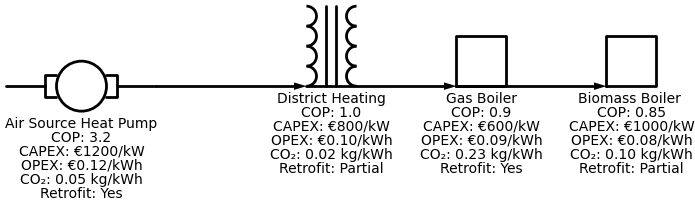

In [49]:
# 10.) tech specs for equipments / especificaciones para equipos.
with schemdraw.Drawing() as d:
    d.config(fontsize=10)

    # Air Source Heat Pump / Bomba de calor 
    d += elm.Motor().label('Air Source Heat Pump\nCOP: 3.2\nCAPEX: €1200/kW\nOPEX: €0.12/kWh\nCO₂: 0.05 kg/kWh\nRetrofit: Yes', loc='bottom')
    d += elm.Arrow().right()

    # District Heating / 
    d += elm.Transformer().label('District Heating\nCOP: 1.0\nCAPEX: €800/kW\nOPEX: €0.10/kWh\nCO₂: 0.02 kg/kWh\nRetrofit: Partial', loc='bottom')
    d += elm.Arrow().right()

    # Gas Boiler /
    d += elm.Rect().label('Gas Boiler\nCOP: 0.9\nCAPEX: €600/kW\nOPEX: €0.09/kWh\nCO₂: 0.23 kg/kWh\nRetrofit: Yes', loc='bottom')
    d += elm.Arrow().right()

    # Biomass Boiler /
    d += elm.Rect().label('Biomass Boiler \nCOP: 0.85\nCAPEX: €1000/kW\nOPEX: €0.08/kWh\nCO₂: 0.10 kg/kWh\nRetrofit: Partial', loc='bottom')


In [50]:
# 11) Avg. Income per postal Code – Spain (Agencia Tributaria)

from load_data import load_avg_income; df_avg_income = load_avg_income()
print(f"- shape: {df_avg_income.shape}\n- dtypes:\n{df_avg_income.dtypes}\n- head(1):\n{df_avg_income.head(1)}")

- shape: (55, 3)
- dtypes:
cod_postal                 object
renta_bruta_media         float64
renta_disponible_media    float64
dtype: object
- head(1):
              cod_postal  renta_bruta_media  renta_disponible_media
0  28001-Salamanca- Goya           130622.0                 98602.0


In [51]:
# 12) Stakeholder Map

#from load_data import load_stakeholder_map; df_stakeholder_map = load_stakeholder_map()
#print(f"- shape: {df_stakeholder_map.shape}\n- dtypes:\n{df_stakeholder_map.dtypes}\n- head(1):\n{df_stakeholder_map.head(1)}")